<a href="https://colab.research.google.com/github/TissaMaria/6thSem-ML-Lab/blob/main/1BM22CS309_Lab_6_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
iris=pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
iris = pd.read_csv('iris.csv')

X = iris.drop('species', axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy (RBF Kernel): 1.0


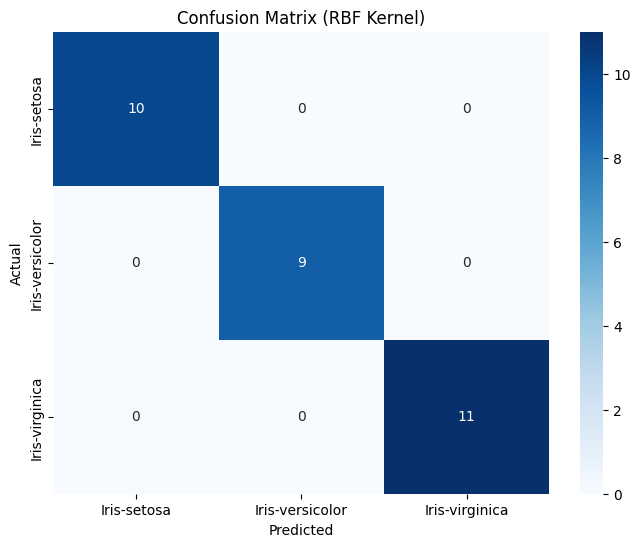

In [ ]:
svm_rbf = SVC(kernel='rbf', gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy (RBF Kernel): {accuracy_rbf}")

cm_rbf = confusion_matrix(y_test, y_pred_rbf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rbf, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris['species'].unique(), yticklabels=iris['species'].unique())
plt.title("Confusion Matrix (RBF Kernel)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Accuracy (Linear Kernel): 1.0


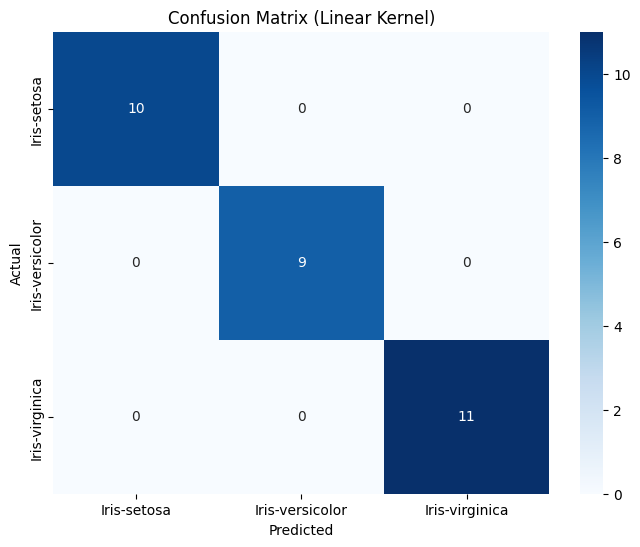

In [ ]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy (Linear Kernel): {accuracy_linear}")

cm_linear = confusion_matrix(y_test, y_pred_linear)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris['species'].unique(), yticklabels=iris['species'].unique())
plt.title("Confusion Matrix (Linear Kernel)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
df2=pd.read_csv('letter-recognition.csv')
df2.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


Accuracy: 0.8545
              precision    recall  f1-score   support

           A       0.88      0.94      0.91       149
           B       0.79      0.87      0.83       153
           C       0.87      0.85      0.86       137
           D       0.78      0.90      0.84       156
           E       0.83      0.90      0.86       141
           F       0.80      0.91      0.85       140
           G       0.77      0.81      0.79       160
           H       0.63      0.59      0.61       144
           I       0.88      0.87      0.88       146
           J       0.83      0.87      0.85       149
           K       0.75      0.80      0.78       130
           L       0.92      0.87      0.90       155
           M       0.95      0.93      0.94       168
           N       0.93      0.89      0.91       151
           O       0.87      0.80      0.83       145
           P       0.95      0.83      0.88       173
           Q       0.85      0.78      0.81       166
          

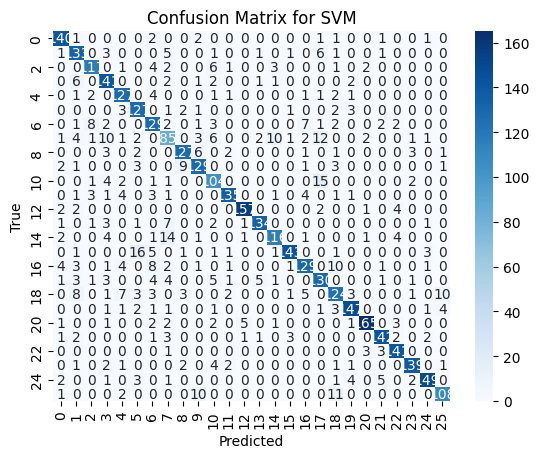

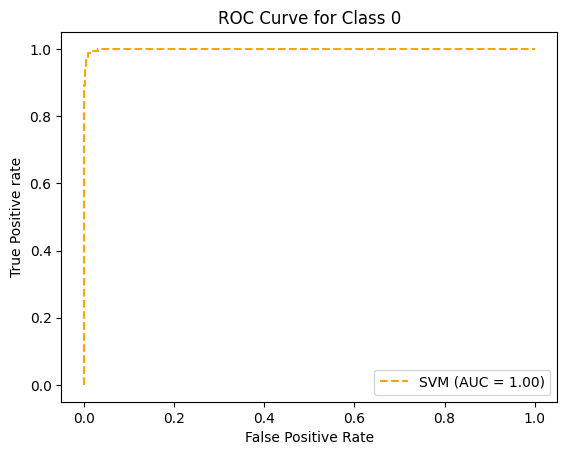

AUC score for class 0: 0.9991634701350125


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
X = df2.drop('letter', axis=1)
y = df2['letter']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(X_train, y_train)


y_pred = svm_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

lb = LabelBinarizer()
lb.fit(y_test)
y_test_lb = lb.transform(y_test)
y_pred_prob = svm_classifier.predict_proba(X_test)
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = y_test_lb.shape[1]

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_lb[:,i], y_pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='SVM (AUC = %0.2f)' % roc_auc[0])
plt.title('ROC Curve for Class 0')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()
print(f"AUC score for class 0: {roc_auc[0]}")
